Importing dependencies

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn import metrics

Load dataset

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (2)\car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

Getting some information about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding Categorical Columns

In [9]:
df.replace({'Fuel_Type':{'Petrol': 0,'Diesel': 1,'CNG': 2}},inplace=True)
df.replace({'Seller_Type':{'Dealer': 0,'Individual': 1}},inplace=True)
df.replace({'Transmission':{'Manual': 0,'Automatic': 1}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23680\3892255136.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol': 0,'Diesel': 1,'CNG': 2}},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_23680\3892255136.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer': 0,'Individual': 1}},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_23680\3892255136.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into feature and target

In [12]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)

Model Training

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
model_prediction = model.predict(X_train)

In [17]:
error_score = metrics.r2_score(y_train,model_prediction )
print('R squared error is:',error_score)

R squared error is: 0.8799451660493708


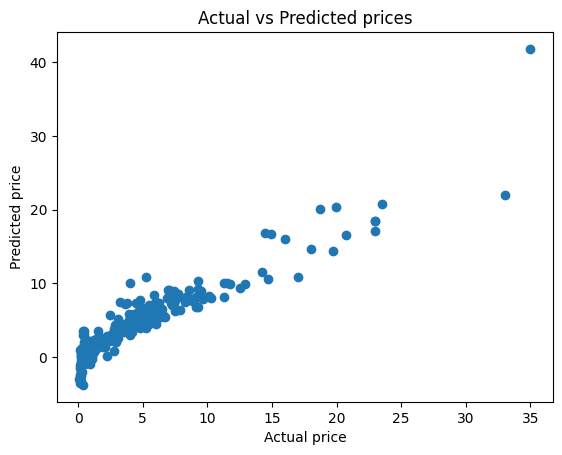

In [18]:
plt.scatter(y_train,model_prediction )
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()

In [22]:
model_prediction_test= model.predict(X_test)

In [23]:
error_score = metrics.r2_score(y_test,model_prediction_test )
print('R squared error is:',error_score)

R squared error is: 0.8365766715026374


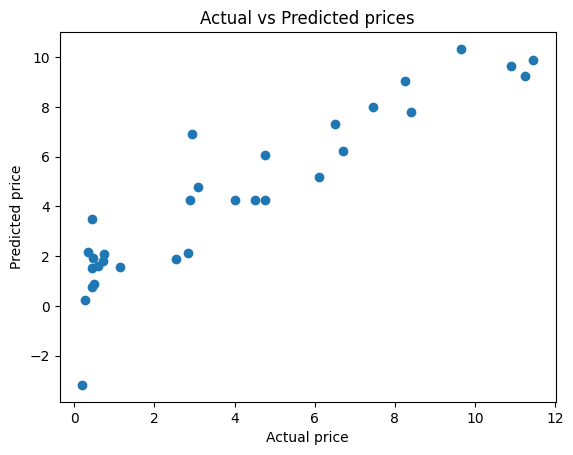

In [24]:
plt.scatter(y_test,model_prediction_test )
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()